In [1]:
import itn.itn_dataset as itn_dataset
import utils

In [2]:
lesion_dataset = itn_dataset.ITNDatasetLesion(directory='valid', subset='isic', augment=False, transforms=[])

In [5]:
import matplotlib.pyplot as plt
plt.imshow(lesion_dataset[0][1].squeeze().numpy().transpose(1, 2, 0) + 0.5)

NameError: name 'lesion_dataset' is not defined

In [1]:
import data.datasets as datasets

In [2]:
dataset = datasets.get_test_dataset('eat')

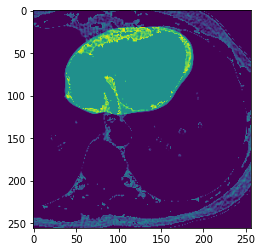

In [8]:
import matplotlib.pyplot as plt
plt.imshow(dataset[27][0].squeeze().numpy() + dataset[27][1].squeeze().numpy())

In [7]:
print(dataset[27][1].median())

tensor(0.)


[ -8. -17.]


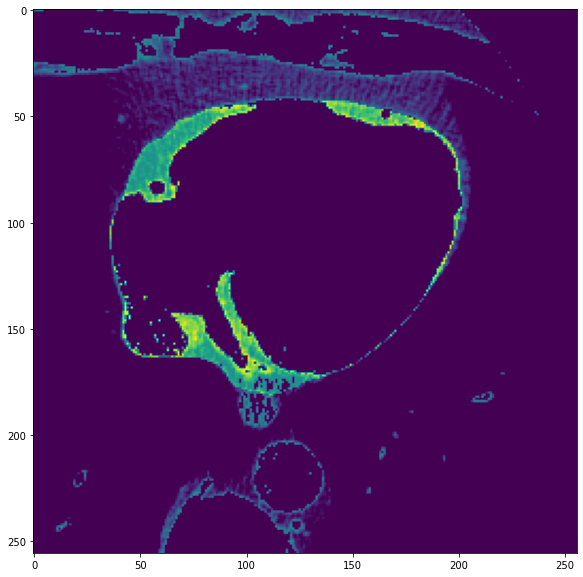

In [40]:
import numpy as np
import cv2 as cv
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

x, y = dataset[60]
x = x.squeeze().numpy()
y = y.squeeze().numpy()

shift, error, diffphase = phase_cross_correlation(x, y)
M = np.float32([[1,0, shift[1]], [0,1, shift[0]]])
rows,cols = y.shape
dst = cv.warpAffine(y, M, (cols,rows), flags=cv.INTER_NEAREST)

plt.figure(figsize=(10, 10))
plt.imshow(x + dst)
plt.show()

In [1]:
import data.datasets

In [10]:
_, aorta_dataset = data.datasets.get_datasets('aorta', subset='D', augment=False)

0.33195020746887965 0.3941908713692946


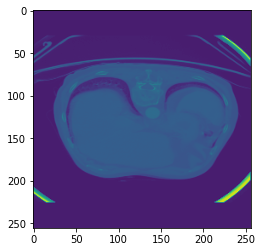

In [11]:
import matplotlib.pyplot as plt
plt.imshow(aorta_dataset[20][0].squeeze().numpy())
i = 3420 + 1400.
a = (200 + 1400.)
b = (500 + 1400.)
print(a / i, b / i)

In [14]:
print(aorta_dataset[0][0].min(), aorta_dataset[0][0].max())

tensor(0.) tensor(1.)


In [52]:
theta = torch.tensor([[89, 0.7]])
test = nn.Sigmoid()(torch.tensor([[(0.7 - 0.5) * 10]]))
print(test)
#plt.imshow(test.squeeze().numpy())

tensor([[0.8808]])


tensor(0.) tensor(1.)
tensor(0.) tensor(0.2311)


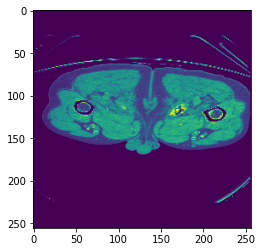

In [275]:
import torch
import torch.nn as nn

def sigmoid(x, k=10):
  return torch.nn.Sigmoid()(x)

theta = torch.tensor([[0.3, 0.3]])
x = aorta_dataset[0][0].unsqueeze(0)
print(x.min(), x.max())

alpha = 50

#plt.imshow(sigmoid((x - theta[:, 0].view(-1, 1, 1, 1))).squeeze().numpy())
x = x * sigmoid(alpha * (x - theta[:, 0].view(-1, 1, 1, 1)))
# normalize x to [0, 1]
x = x * sigmoid(alpha * (theta[:, 1].view(-1, 1, 1, 1) - x))
# x = (x - x.min()) / (x.max() - x.min())
# x = 1 - sigmoid((-x + theta[:, 1].view(-1, 1, 1, 1)))
# x = (x - x.min()) / (x.max() - x.min())
normalized = (x - x.min()) / (x.max() - x.min())
print(x.min(), x.max())
plt.imshow(x.squeeze().numpy())

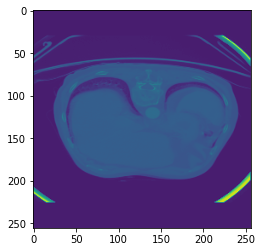

tensor(0.) tensor(1.)


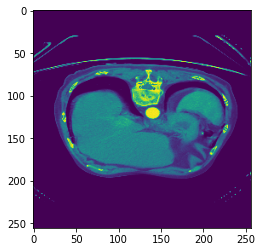

In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

def smooth_threshold(x, low, high):
  slope = 50
  th_low = 1 / (1 + torch.exp(slope * (low - x)))
  th_high = 1 / (1 + torch.exp(-slope * (high - x)))
  return th_low + th_high - 1

x = aorta_dataset[20][0].unsqueeze(0)
plt.imshow(x.squeeze())
plt.show()
x = x * smooth_threshold(x, torch.tensor([[0.3]]), torch.tensor([[0.4]]))
# normalize x to [0, 1]
x = (x - x.min()) / (x.max() - x.min())
print(x.min(), x.max())
plt.imshow(x.squeeze().numpy())